In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# network size N
N = 5000

# number of edges
M = N*30

## initialize time
T = 0
## choose Tmax
Tmax = 1000


In [13]:
def find_extinction_time(b, E):

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def variance_in_extinction_time_simulation(b_array, E):

    variances = np.zeros(len(b_array))

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction_times = []

        if round(find_extinction_time(b, E)) == Tmax:
            
            ## just slightly greater than 0 to avoid errors in the log scale 
            variances[i] = 0.000001
        
        else:
        
            for t in range(20):

                extinction_times.append(find_extinction_time(b, E))

            variances[i] = np.var(extinction_times)
        
        print(variances[i])
    
    return variances


In [4]:
b_array = np.linspace(0, 0.020, 20)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*30, 2))

uniform_variances = variance_in_extinction_time_simulation(b_array, E)
print(uniform_variances)


1.5108701773743594
1.4697771068661987
2.0931107316297886
0.6008733420313179
1.4631362786881197
3.2089970975566344
13.452980653682095
7.415530527465933
1.9597117442511274
2.9574160280764312
4.355975458505973
5.991524451043781
11.351404281536063
40.401327275296175
46.545440395389726
54.29399570824487
147.40814257089
532.7375400998123
31600.693118337764
0.0
[1.51087018e+00 1.46977711e+00 2.09311073e+00 6.00873342e-01
 1.46313628e+00 3.20899710e+00 1.34529807e+01 7.41553053e+00
 1.95971174e+00 2.95741603e+00 4.35597546e+00 5.99152445e+00
 1.13514043e+01 4.04013273e+01 4.65454404e+01 5.42939957e+01
 1.47408143e+02 5.32737540e+02 3.16006931e+04 0.00000000e+00]


In [11]:
uniform_variances = [1.5108701773743594,
1.4697771068661987,
2.0931107316297886,
0.6008733420313179,
1.4631362786881197,
3.2089970975566344,
13.452980653682095,
7.415530527465933,
1.9597117442511274,
2.9574160280764312,
4.355975458505973,
5.991524451043781,
11.351404281536063,
40.401327275296175,
46.545440395389726,
54.29399570824487,
147.40814257089,
532.7375400998123,
31600.693118337764,
0.0]


c:\Users\sharm\anaconda3\envs\iibproject\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


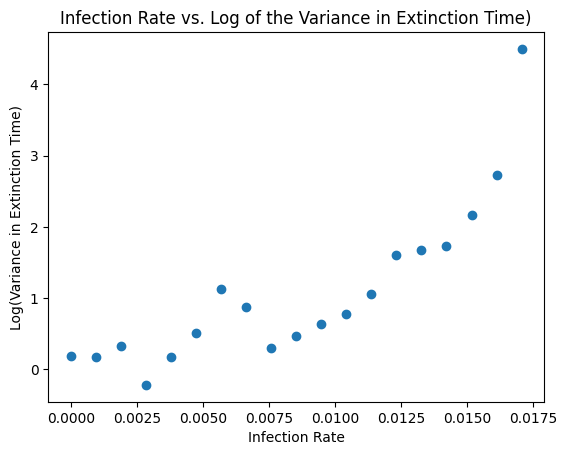

In [12]:
import matplotlib.pyplot as plt
plt.scatter(b_array, np.log10(uniform_variances))
plt.title('Infection Rate vs. Log of the Variance in Extinction Time)')
plt.ylabel('Log(Variance in Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()
